In [4]:
import numpy as np
import numpy.matlib
import pandas as pd
import requests
from math import ceil
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt

In [5]:
# view-source:https://www.snowyhydro.com.au/our-energy/water/storages/lake-levels-calculator/
url='https://www.snowyhydro.com.au/wp-content/themes/snowyhydro/inc/getData.php'

In [6]:
current_year = sorted(list(range(1956,2023,2)),key=int, reverse=True)
past_years =  sorted(list(range(1955,2022,2)),key=int, reverse=True)

In [7]:
df_current = []
df_past = []

for x, y in zip(current_year, past_years):
    params = {'yearA': x, 'yearB': y}
    response=requests.get(url, params=params)
    soup = BeautifulSoup(response.text, 'html.parser')
    df_json = json.loads(soup.text.strip())
    snow_data = df_json[str(x)]['snowyhydro']['level']
    snow_depth = pd.DataFrame(snow_data)['snow'].dropna()
  
    for i in snow_depth:
        if len(i) < 4:
            df_current.append(pd.DataFrame.from_dict(i))
        else:
            df_current.append(pd.DataFrame.from_dict(i, orient='index').T)
            
    snow_data = df_json[str(y)]['snowyhydro']['level']
    snow_depth = pd.DataFrame(snow_data)['snow'].dropna()
  
    for i in snow_depth:
        if len(i) < 4:
            df_past.append(pd.DataFrame.from_dict(i))
        else:
            df_past.append(pd.DataFrame.from_dict(i, orient='index').T)
                        
            
df_current = pd.concat(df_current, sort=True)
df_past = pd.concat(df_past, sort=True)

In [8]:
df = pd.concat([df_current,df_past])

In [9]:
df.columns = ['Depth', 'Datetime', 'Location', 'Quality']
df.set_index('Datetime', inplace=True)
df.index = pd.DatetimeIndex(df.index)
df.Depth = df.Depth.astype('float')

In [10]:
Location_Gp = df.groupby('Location')
df_pivot = df.pivot_table(index=df.index, columns='Location', values='Depth')

In [11]:
df_pivot

Location,Deep Creek,Spencers Creek,Three Mile Dam
Datetime,,,
1955-06-01 12:00:00,NaN,0.0,NaN
1955-06-06 12:00:00,NaN,24.9,NaN
1955-06-16 12:00:00,NaN,0.0,NaN
1955-06-25 12:00:00,NaN,NaN,0.0
1955-06-27 12:00:00,NaN,61.0,NaN
...,...,...,...
2022-09-27 10:00:00,NaN,190.9,NaN
2022-09-28 12:00:00,0.0,NaN,NaN
2022-10-05 09:20:00,NaN,166.2,NaN


In [8]:
#Extract data for each locations
Spencers_creek = df_pivot['Spencers Creek'].dropna()
Deep_creek = df_pivot['Deep Creek'].dropna()
Three_Mile_Dam = df_pivot['Three Mile Dam'].dropna()

In [9]:
#Extract Overview Stats
df.groupby([df.Location, df.index.year]).describe()


Depth                                             \
                        count       mean        std  min     25%     50%   
Location       Datetime                                                    
Deep Creek     1957       6.0  40.766667  31.772986  0.0  13.775   57.90   
               1958       8.0  44.162500  42.832062  0.0   7.650   32.90   
               1959      15.0  27.520000  27.641563  0.0   0.000   26.90   
               1960      27.0  98.681481  47.331783  0.0  83.900  111.80   
               1961      19.0  73.905263  39.401952  0.0  48.000   87.10   
...                       ...        ...        ...  ...     ...     ...   
Three Mile Dam 2018      20.0  13.636500  11.413563  0.0   0.000   17.62   
               2019      21.0   6.427619  10.151530  0.0   0.000    1.33   
               2020      20.0   4.972500  15.457237  0.0   0.000    0.00   
               2021      19.0   4.263158  11.174088  0.0   0.000    0.00   
               2022       9.0  10.485556  18.068955  0.0   0.000    1.80   

                                         
                             75%    max  
Location       Datetime                  
Deep Creek     1957       62.425   65.8  
               1958       82.725  106.4  
               1959       49.900   72.6  
               1960      132.050  167.6  
               1961      105.550  114.0  
...                          ...    ...  
Three Mile Dam 2018       23.500   32.8  
               2019        6.900   35.4  
               2020        0.000   67.4  
               2021        0.250   37.7  
               2022       12.300   55.9  

[202 rows x 8 columns]

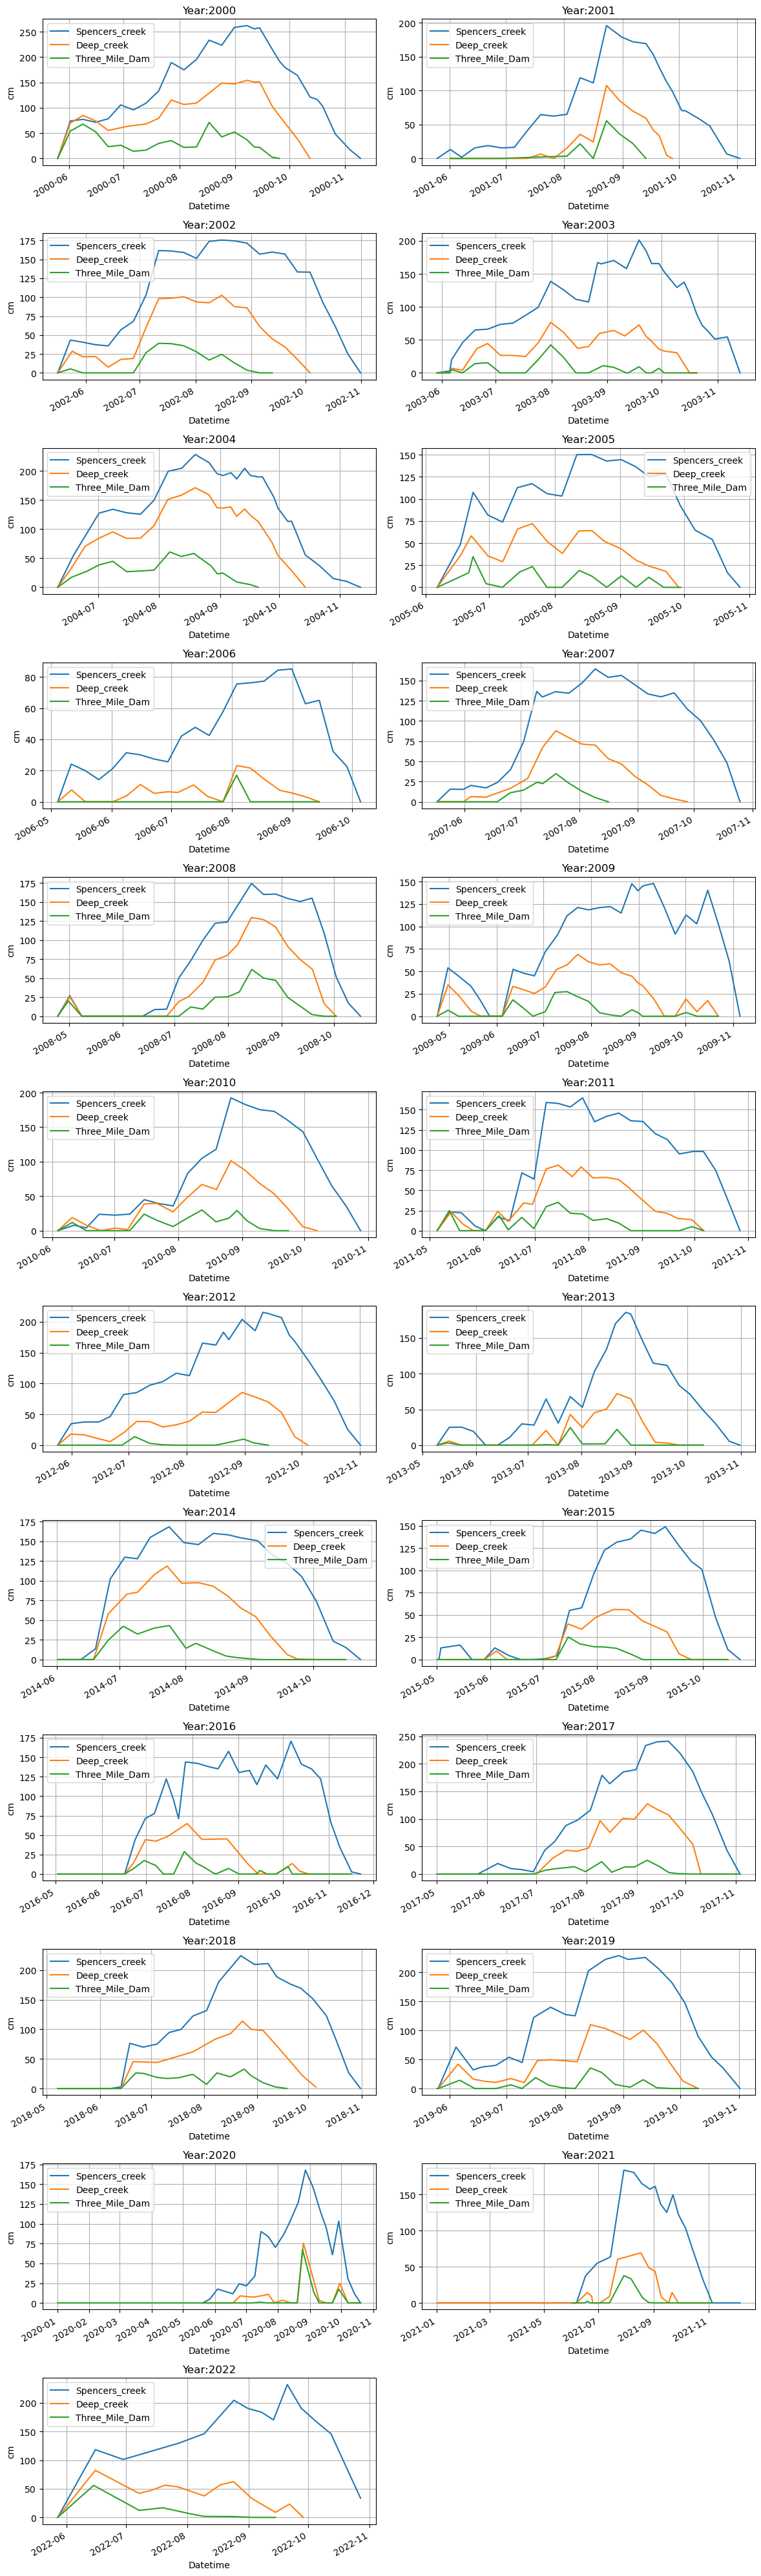

In [10]:
start_ = 2000
end_ = 2023

row_=ceil(np.size(range(start_, end_,1))/2)

fig, ax = plt.subplots(row_, 2, figsize=(12,40))
ax = ax.flatten()
i_count = 0

for i in range(start_, end_ ,1):
    year_ = str(i)
    Spencers_creek[year_].plot(label = 'Spencers_creek',ax=ax[i_count])
    Deep_creek[year_].plot(label = 'Deep_creek',ax=ax[i_count])
    Three_Mile_Dam[year_].plot(label = 'Three_Mile_Dam',ax=ax[i_count])
    ax[i_count].set_title('Year:'+ year_)
    ax[i_count].set_ylabel('cm')
    ax[i_count].legend()
    ax[i_count].grid()
    i_count = i_count + 1
    
fig.tight_layout()

for i in range(int(row_*2 - len(range(start_, end_, 1)))):
    temp_=row_*2 -i -1
    fig.delaxes(ax.flatten()[int(temp_)])
